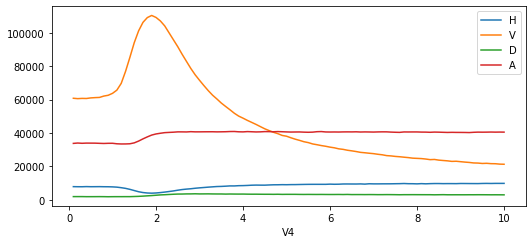

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

headers = ['V4', 'H', 'V', 'D', 'A']

df = pd.read_csv('20220507_204107_lcvr_v2.csv', names=headers)

df.set_index('V4').plot()

plt.show()

In [28]:
max_idx=df.idxmax(axis=0)["V"]

In [29]:
max_val=df["V"][18]

In [25]:
df.loc[:18,"V"] = df.loc[:18,"V"] + 2*(max_val - df.loc[:18,"V"])

In [30]:
df["V"]=np.arccos(1-(2*df["V"])/max_val)

In [31]:
df["V"]

0     1.672579
1     1.668430
2     1.671087
3     1.670068
4     1.676437
        ...   
95    0.922126
96    0.917369
97    0.916320
98    0.910877
99    0.909112
Name: V, Length: 100, dtype: float64

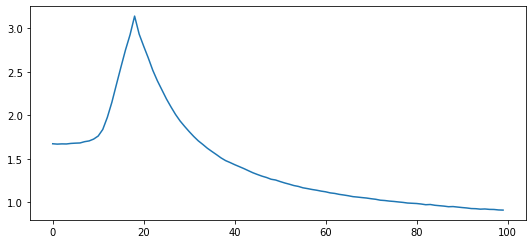

In [34]:
df["V"].plot()

plt.show()

In [39]:
max_idx = df.idxmax(axis=0)["V"]
max_val = df["V"][max_idx]

In [40]:
df.loc[:18,"V"] = df.loc[:18,"V"] + 2*(max_val - df.loc[:18,"V"])

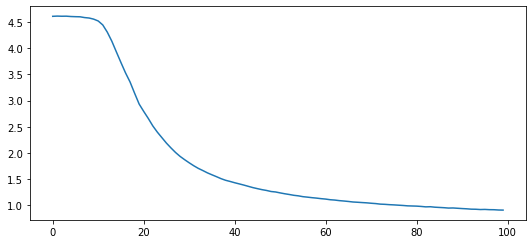

In [41]:
df["V"].plot()

plt.show()

In [42]:
df

,V4,H,V,D,A
0,0.1,7877,4.610607,1907,33798
1,0.2,7832,4.614755,1911,34015
2,0.3,7818,4.612099,1910,33860
3,0.4,7903,4.613118,1866,33974
4,0.5,7836,4.606748,1869,33956
...,...,...,...,...,...
95,9.6,9821,0.922126,3014,40544
96,9.7,9781,0.917369,2988,40601
97,9.8,9829,0.916320,3001,40545
98,9.9,9827,0.910877,2987,40585


In [47]:
df[["V4","V"]].to_csv('lcvr_callibration.csv',index=False)

In [48]:
df[["V4","V"]]

,V4,V
0,0.1,4.610607
1,0.2,4.614755
2,0.3,4.612099
3,0.4,4.613118
4,0.5,4.606748
...,...,...
95,9.6,0.922126
96,9.7,0.917369
97,9.8,0.916320
98,9.9,0.910877


In [64]:
tmp = df["V"].to_numpy()
type(tmp)
tmp.shape
gradient_array = np.gradient(tmp,0.1)

In [65]:
df["grad"] = gradient_array

In [66]:
df

,V4,H,V,D,A,grad
0,0.1,7877,4.610607,1907,33798,0.041482
1,0.2,7832,4.614755,1911,34015,0.007461
2,0.3,7818,4.612099,1910,33860,-0.008186
3,0.4,7903,4.613118,1866,33974,-0.026754
4,0.5,7836,4.606748,1869,33956,-0.047416
...,...,...,...,...,...,...
95,9.6,9821,0.922126,3014,40544,-0.012756
96,9.7,9781,0.917369,2988,40601,-0.029029
97,9.8,9829,0.916320,3001,40545,-0.032457
98,9.9,9827,0.910877,2987,40585,-0.036040


In [67]:
df[["V4","V","grad"]].to_csv('lcvr_callibration.csv',index=False)

In [68]:
df.round(3)

,V4,H,V,D,A,grad
0,0.1,7877,4.611,1907,33798,0.041
1,0.2,7832,4.615,1911,34015,0.007
2,0.3,7818,4.612,1910,33860,-0.008
3,0.4,7903,4.613,1866,33974,-0.027
4,0.5,7836,4.607,1869,33956,-0.047
...,...,...,...,...,...,...
95,9.6,9821,0.922,3014,40544,-0.013
96,9.7,9781,0.917,2988,40601,-0.029
97,9.8,9829,0.916,3001,40545,-0.032
98,9.9,9827,0.911,2987,40585,-0.036


In [69]:
df[["V4","V","grad"]].to_csv('lcvr_callibration.csv',index=False)

In [72]:
df[["V4","V","grad"]].round(3).to_csv('lcvr_callibration.csv',index=False)

In [77]:
df["V"]
type(df["V"])

pandas.core.series.Series

In [76]:
df[["V"]]
type(df[["V"]])

pandas.core.frame.DataFrame

In [81]:
df[["V"]] = df[["V"]] - 1.2

In [83]:
df[["vdiff"]] = df[["V"]] - 1.2

In [88]:
df

,V4,H,V,D,A,grad,vdiff
0,0.1,7877,2.210607,1907,33798,0.041482,1.010607
1,0.2,7832,2.214755,1911,34015,0.007461,1.014755
2,0.3,7818,2.212099,1910,33860,-0.008186,1.012099
3,0.4,7903,2.213118,1866,33974,-0.026754,1.013118
4,0.5,7836,2.206748,1869,33956,-0.047416,1.006748
...,...,...,...,...,...,...,...
95,9.6,9821,-1.477874,3014,40544,-0.012756,-2.677874
96,9.7,9781,-1.482631,2988,40601,-0.029029,-2.682631
97,9.8,9829,-1.483680,3001,40545,-0.032457,-2.683680
98,9.9,9827,-1.489123,2987,40585,-0.036040,-2.689123


In [87]:
df[["vdiff"]].abs().idxmin()

vdiff    16
dtype: int64

In [105]:
pos = df[df["vdiff"] > 0][["vdiff"]].idxmin()

In [96]:
df.loc[14:18]

,V4,H,V,D,A,grad,vdiff
14,1.5,5528,1.529377,1968,34118,-2.032450,0.329377
15,1.6,4826,1.327499,2057,35193,-1.992695,0.127499
16,1.7,4343,1.130838,2193,36505,-1.854858,-0.069162
17,1.8,4065,0.956528,2364,37699,-1.946226,-0.243472
18,1.9,3960,0.741593,2525,38785,-2.110020,-0.458407


In [107]:
pos2 = df[df["vdiff"] > 0][["vdiff"]]

In [121]:
min_idx=pos2.idxmin()

In [122]:
a = df["V"][min_idx]
a

15    1.327499
Name: V, dtype: float64

In [124]:
b = df["H"][min_idx]
b

15    4826
Name: H, dtype: int64

In [128]:
type(float(a*b))

float